# ТР 3

Objectif de TP - Optimisation des Feux de Circulation avec Apprentissage par Renforcement


L'objectif de ce TP est d'explorer l'optimisation des feux de circulation à l'aide de l'apprentissage par renforcement. Les étudiants vont :
- Découvrir un environnement simulé de gestion du trafic.
- Implémenter Q-Learning et SARSA pour apprendre une politique optimale.
- Comparer les résultats des deux algorithmes à l'aide de graphiques et d'évaluations quantitatives.

## Exercice 1: Decouvrire l'environnement

In [13]:
import numpy as np
from traffic_env import TrafficEnvironment
import numpy as np
import matplotlib.pyplot as plt

🚦 Initial Traffic Light Simulation 🚦
State Format: [Cars North, Cars South, Cars East, Cars West]
Actions: 0 = Keep Current Light, 1 = Switch Light
Initial state: [8 7 3 8] (NS Green, EW Red)
Step 1:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [9 9 1 4]
  🎯 Reward (Cars Passed): 6
----------------------------------------
Step 2:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [ 9 10  0  2]
  🎯 Reward (Cars Passed): 3
----------------------------------------
Step 3:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [11 11  2  2]
  🎯 Reward (Cars Passed): 2
----------------------------------------
Step 4:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [12 13  1  2]
  🎯 Reward (Cars Passed): 4
----------------------------------------
Step 5:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [13 15  1  1]
  🎯 Reward (Cars Passed): 3
------

In [17]:
from traffic_env import TrafficEnvironment

env = TrafficEnvironment ()
state = env.reset ()

for _ in range(10):
    action = 0 # Garder le feu tel qu'il est
    next_state, reward = env.step(action)
    print (f"État : {next_state}, Récompense : {reward}")


État : [3 1 8 6], Récompense : 3
État : [1 0 9 6], Récompense : 4
État : [0 1 9 6], Récompense : 1
État : [ 0  0 10  6], Récompense : 1
État : [ 0  2 11  6], Récompense : 0
État : [ 0  2 12  6], Récompense : 2
État : [ 2  1 14  6], Récompense : 2
État : [ 0  0 14  8], Récompense : 3
État : [ 2  2 16 10], Récompense : 0
État : [ 1  2 17 12], Récompense : 3


## Exercice 2: Implementation de Q-Learning
Instructions :

1. Initialisez une Q-Table pour stocker les valeurs des actions pour chaque état.
2. Implémentez l'algorithme Q-Learning, en mettant à jour la Q-Table à chaque itération.
3. Utilisez une stratégie -greedy pour gérer l'exploration/exploitation.
4. Exécutez l'apprentissage sur plusieurs épisodes et Affichez la Q-Table finale après l'entraînement.

Le Q-Learning suit la mise à jour suivante : Q(s,a) +Q(s,a) +a R+ymax Q(s',a')-Q(s,a)

In [48]:
import numpy as np
from traffic_env import TrafficEnvironment

# Initialisation de la Q-Table : dimensions [N, S, E, W, actions]
q_table = np.zeros((10, 10, 10, 10, 2))

def train_q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995, min_epsilon=0.01):
    global q_table

    for episode in range(episodes):
        state = env.reset()
        state = np.clip(state, 0, 9)  # Empêcher les débordements
        done = False

        for step in range(100):  # Limite de pas par épisode
            n, s, e, w = state

            # ε-greedy : choisir action
            if np.random.rand() < epsilon:
                action = np.random.choice([0, 1])
            else:
                action = np.argmax(q_table[n, s, e, w])

            # Effectuer l'action
            next_state, reward = env.step(action)
            next_state = np.clip(next_state, 0, 9)
            n2, s2, e2, w2 = next_state

            # Mise à jour Q-Learning
            best_next = np.max(q_table[n2, s2, e2, w2])
            q_table[n, s, e, w, action] += alpha * (
                reward + gamma * best_next - q_table[n, s, e, w, action]
            )

            # Passer à l'état suivant
            state = next_state

        # Réduire epsilon (moins d'exploration)
        epsilon = max(min_epsilon, epsilon * decay)

    print("\n✅ Entraînement terminé.")
    return q_table

env = TrafficEnvironment()
q_table = train_q_learning(env, episodes=1000)

print("\n🔍 Extrait de la Q-table après apprentissage :")
for n in range(0, 10, 3):
    for s in range(0, 10, 3):
        for e in range(0, 10, 3):
            for w in range(0, 10, 3):
                print(f"État [{n},{s},{e},{w}] → {q_table[n,s,e,w]}")


✅ Entraînement terminé.

🔍 Extrait de la Q-table après apprentissage :
État [0,0,0,0] → [17.93573836  3.18326259]
État [0,0,0,3] → [ 1.23081902 20.93632177]
État [0,0,0,6] → [2.01919656 0.        ]
État [0,0,0,9] → [0.018 0.   ]
État [0,0,3,0] → [ 1.01702208 20.14049976]
État [0,0,3,3] → [ 7.38128857 23.24466604]
État [0,0,3,6] → [ 0.         14.66331761]
État [0,0,3,9] → [0.14608127 4.73195147]
État [0,0,6,0] → [0. 0.]
État [0,0,6,3] → [ 0.29066684 15.58525711]
État [0,0,6,6] → [0.         5.30815351]
État [0,0,6,9] → [0.39472037 5.68112616]
État [0,0,9,0] → [0.0930843 0.       ]
État [0,0,9,3] → [0.07227809 3.20679994]
État [0,0,9,6] → [1.09343401 0.        ]
État [0,0,9,9] → [0.36101724 8.35556366]
État [0,3,0,0] → [15.95701652  4.48229729]
État [0,3,0,3] → [9.67709755 0.        ]
État [0,3,0,6] → [0.84797825 0.        ]
État [0,3,0,9] → [0.1 0. ]
État [0,3,3,0] → [12.7632968   1.24520033]
État [0,3,3,3] → [16.9189357  0.       ]
État [0,3,3,6] → [2.77042201 0.        ]
État [0,3,3

## Exercice 3 : Implémentation de SARSA


Instructions :

1. Créez une nouvelle Q-Table pour SARSA.
2. Mettez en œuvre l'algorithme SARSA, qui met à jour la Q-Table avec la valeur de l'action effectivement choisie.
3. Utilisez une stratégie e-greedy.
4. Affichez la Q-Table finale et comparez avec celle de Q-Learning.

SARSA suit la mise à jour suivante :
Q(8,a)+-Q(s,a)+a[R+yQ(s';a')-Q(s,a)]

In [50]:
import numpy as np
from traffic_env import TrafficEnvironment

# Nouvelle Q-table pour SARSA
q_sarsa = np.zeros((10, 10, 10, 10, 2))

def train_sarsa(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995, min_epsilon=0.01):
    global q_sarsa

    for episode in range(episodes):
        state = env.reset()
        state = np.clip(state, 0, 9)
        n, s, e, w = state

        # Choisir action initiale
        if np.random.rand() < epsilon:
            action = np.random.choice([0, 1])
        else:
            action = np.argmax(q_sarsa[n, s, e, w])

        for step in range(100):
            next_state, reward = env.step(action)
            next_state = np.clip(next_state, 0, 9)
            n2, s2, e2, w2 = next_state

            # Choisir action suivante (SARSA)
            if np.random.rand() < epsilon:
                next_action = np.random.choice([0, 1])
            else:
                next_action = np.argmax(q_sarsa[n2, s2, e2, w2])

            # Mise à jour SARSA
            q_sarsa[n, s, e, w, action] += alpha * (
                reward + gamma * q_sarsa[n2, s2, e2, w2, next_action] - q_sarsa[n, s, e, w, action]
            )

            # Mise à jour état/action
            state = next_state
            n, s, e, w = state
            action = next_action

        # Réduction d’epsilon
        epsilon = max(min_epsilon, epsilon * decay)

    print("\n✅ Entraînement SARSA terminé.")
    return q_sarsa

env = TrafficEnvironment()
q_sarsa = train_sarsa(env, episodes=1000)


print("\n🔍 Extrait Q-table SARSA :")
for n in range(0, 10, 3):
    for s in range(0, 10, 3):
        for e in range(0, 10, 3):
            for w in range(0, 10, 3):
                print(f"État [{n},{s},{e},{w}] → {q_sarsa[n,s,e,w]}")


✅ Entraînement SARSA terminé.

🔍 Extrait Q-table SARSA :
État [0,0,0,0] → [17.40379573  3.61537605]
État [0,0,0,3] → [ 1.75893686 18.96800988]
État [0,0,0,6] → [0.39992189 0.        ]
État [0,0,0,9] → [0.05067652 0.        ]
État [0,0,3,0] → [ 3.84337473 19.23604325]
État [0,0,3,3] → [ 4.98903194 23.67497304]
État [0,0,3,6] → [0.         9.17968915]
État [0,0,3,9] → [0.009      6.46390802]
État [0,0,6,0] → [0.76932403 0.        ]
État [0,0,6,3] → [0.         5.67528878]
État [0,0,6,6] → [0.24924339 5.43056719]
État [0,0,6,9] → [0.01758551 8.04539777]
État [0,0,9,0] → [0. 0.]
État [0,0,9,3] → [0.6        3.68171623]
État [0,0,9,6] → [0.29241187 6.89707768]
État [0,0,9,9] → [0.38437974 7.82688357]
État [0,3,0,0] → [15.33110961  2.20706932]
État [0,3,0,3] → [7.59720404 1.007635  ]
État [0,3,0,6] → [0.45177925 0.        ]
État [0,3,0,9] → [0. 0.]
État [0,3,3,0] → [8.84391377 0.91594335]
État [0,3,3,3] → [9.1417728 0.       ]
État [0,3,3,6] → [2.15186553 0.        ]
État [0,3,3,9] → [0.787

## Exercice 4 : Analyse et Visualisation des Résultats

Instructions :

1. Générez un graphique montrant l'évolution des récompenses au fil des épisodes.
2. Comparez la rapidité d'apprentissage entre les deux algorithmes.
3. Affichez les meilleures politiques apprises.
4. Ajoutez les scores enregistrés pendant l'apprentissage.
5. Interprétez le graphique : Quel algorithme apprend plus vite ?

In [53]:
def train_q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995, min_epsilon=0.01):
    global q_table
    rewards_per_episode = []

    for episode in range(episodes):
        state = env.reset()
        state = np.clip(state, 0, 9)
        total_reward = 0

        for step in range(100):
            n, s, e, w = state
            if np.random.rand() < epsilon:
                action = np.random.choice([0, 1])
            else:
                action = np.argmax(q_table[n, s, e, w])

            next_state, reward = env.step(action)
            next_state = np.clip(next_state, 0, 9)
            n2, s2, e2, w2 = next_state

            best_next = np.max(q_table[n2, s2, e2, w2])
            q_table[n, s, e, w, action] += alpha * (reward + gamma * best_next - q_table[n, s, e, w, action])

            state = next_state
            total_reward += reward

        epsilon = max(min_epsilon, epsilon * decay)
        rewards_per_episode.append(total_reward)

    return q_table, rewards_per_episode


In [55]:
def train_sarsa(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995, min_epsilon=0.01):
    global q_sarsa
    rewards_per_episode = []

    for episode in range(episodes):
        state = env.reset()
        state = np.clip(state, 0, 9)
        n, s, e, w = state

        if np.random.rand() < epsilon:
            action = np.random.choice([0, 1])
        else:
            action = np.argmax(q_sarsa[n, s, e, w])

        total_reward = 0

        for step in range(100):
            next_state, reward = env.step(action)
            next_state = np.clip(next_state, 0, 9)
            n2, s2, e2, w2 = next_state

            if np.random.rand() < epsilon:
                next_action = np.random.choice([0, 1])
            else:
                next_action = np.argmax(q_sarsa[n2, s2, e2, w2])

            q_sarsa[n, s, e, w, action] += alpha * (
                reward + gamma * q_sarsa[n2, s2, e2, w2, next_action] - q_sarsa[n, s, e, w, action]
            )

            state = next_state
            n, s, e, w = state
            action = next_action
            total_reward += reward

        epsilon = max(min_epsilon, epsilon * decay)
        rewards_per_episode.append(total_reward)

    return q_sarsa, rewards_per_episode


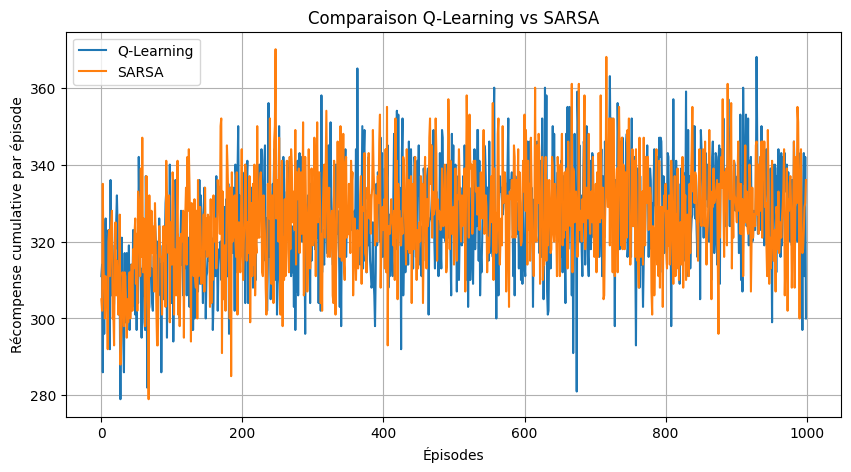

In [46]:
env = TrafficEnvironment()

# Entraînement
q_table, q_learning_rewards = train_q_learning(env, episodes=1000)
q_sarsa, sarsa_rewards = train_sarsa(env, episodes=1000)

# Affichage graphique
plt.figure(figsize=(10, 5))
plt.plot(q_learning_rewards, label="Q-Learning")
plt.plot(sarsa_rewards, label="SARSA")
plt.xlabel("Épisodes")
plt.ylabel("Récompense cumulative par épisode")
plt.title("Comparaison Q-Learning vs SARSA")
plt.legend()
plt.grid()
plt.show()
